### Binary Search Intuition

After rotated sorted array, there are two sorted arrays appended to each other.

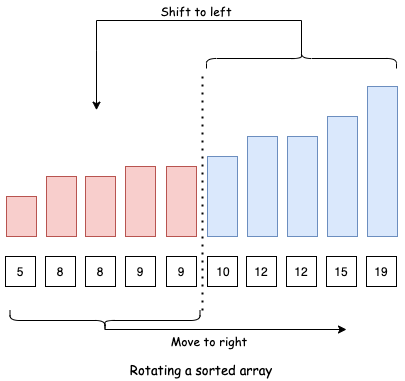

Observe all elements of second array are smaller than or equal to first element of first array.

Use this observation to determine if `target` lies in first or second array.

#### Case 1: `target > arr[start]`
`target` exists in first array

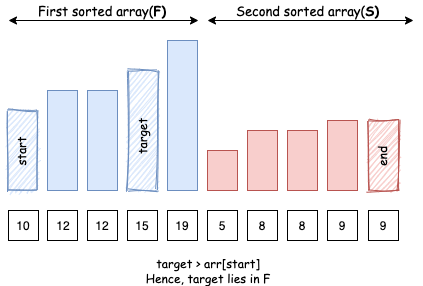

#### Case 2: `target < arr[start]`
`target` exists in second array

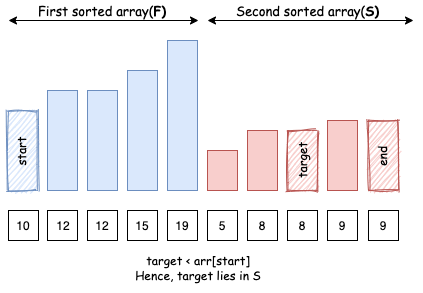

#### Case 3: `target == arr[start]`
`target` exists in first array, but might also be in second array

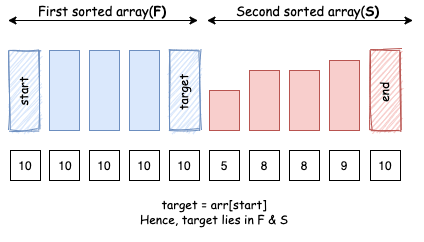

### Algorithm
Use `start` and `end` to track search scope, dividing array into three parts `[start, mid)`, `[mid, mid]`, `(mid, end]`

Identify positions of `arr[mid]` and `target` in first and second array to reduce search space

#### Case 1: `arr[mid]` in first array, `target` in second array
Target lies in `(mid, end]`

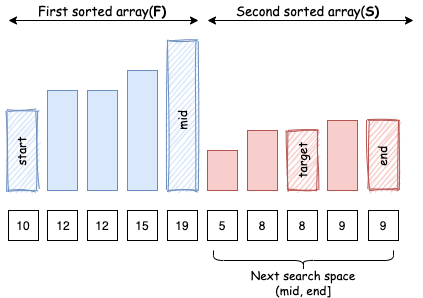

#### Case 2: `arr[mid]` in second array, `target` in first array
Target lies in `[start, mid)`

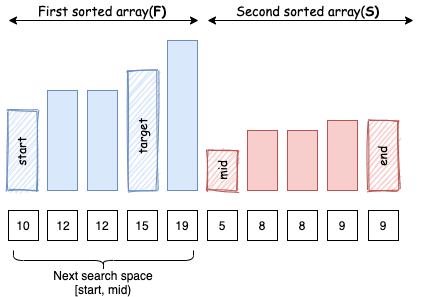

#### Case 3: `arr[mid]` and `target` both in first array
Compare `arr[mid]` to `target` to decide how to reduce search space
- If `arr[mid] < target`, search `(mid, end]`
- If `arr[mid] > target`, search `[start, mid)`

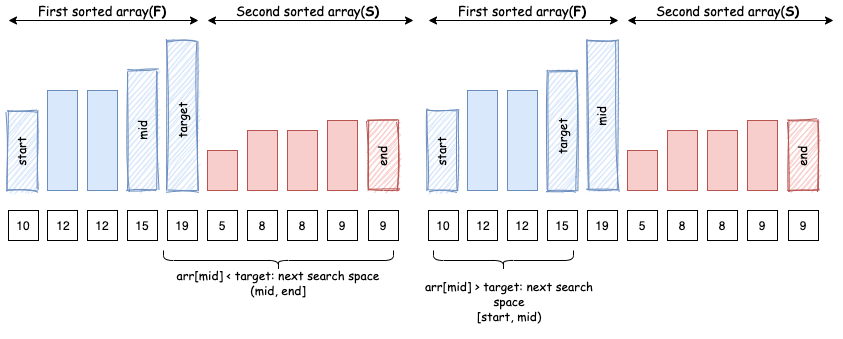

#### Case 4: `arr[mid]` and `target` both in second array
Compare `arr[mid]` to `target` to decide how to reduce search space
- If `arr[mid] > target`, search `[start, mid)`
- If `arr[mid] < target`, search `(mid, end]`

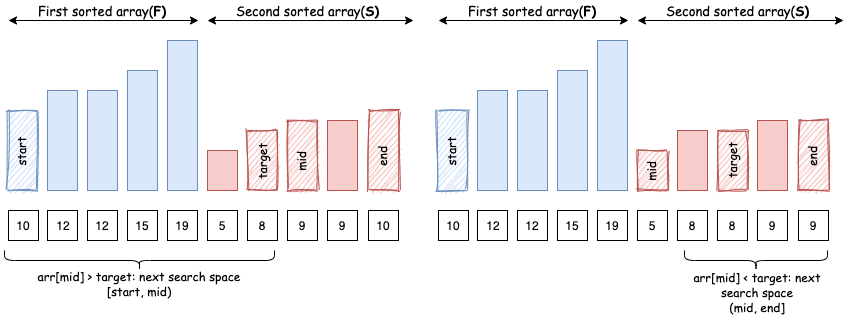

#### Case 5: `arr[mid] == arr[start]`
`arr[mid]` might be in both first and second array, cannot find relative position of `target`
- Must move to next search space iteratively

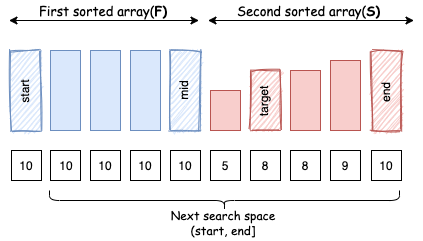

### Code

In [ ]:
def search(nums, target):
    n = len(nums)
    if n == 0:
        return False
    
    left, right = 0, n - 1

    while left <= right:
        mid = left + (right - left) // 2
        if nums[mid] == target:
            return True

        if nums[left] == nums[mid]:
            left += 1
            continue

        pivot_in_first_array = nums[left] <= nums[mid]
        target_in_first_array = nums[left] <= target

        if pivot_in_first_array == target_in_first_array:
            if nums[mid] < target:
                left = mid + 1
            else:
                right = mid - 1
        elif pivot_in_first_array:
            left = mid + 1
        else:
            right = mid - 1
    
    return False